In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import sklearn.neighbors as neighbors
from sklearn.metrics import precision_score, recall_score, zero_one_loss, confusion_matrix
import sklearn.neural_network as nn
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
# KNN avec k = 3 et distance euclidienne (p = 2)
k = 3
distance = 2

precision_knn = []
recall_knn = []
time_knn = []
tot_time_knn = []
error_knn = []
cm_knn = []

# MLPClassifier: RNN avec 10 couches de 50 neurones et alpha = 0.1 (avec ADAM et ReLu par défaut)
nb_couches = 10
archi = tuple(50 for i in range(nb_couches))
a = 0.1

precision_nn = []
recall_nn = []
time_nn = []
tot_time_nn = []
error_nn = []
cm_nn = []

# SVM
noyau = 'poly'
precision_svm = []
recall_svm = []
time_svm = []
tot_time_svm = []
error_svm = []
cm_svm = []

for d_size in [5000,10000,20000,30000,40000,50000,70000]:
    index = np.random.randint(70000, size=d_size)
    data = mnist.data[index]
    target = mnist.target[index]
    #division de la base en données d'apprentissage (80%) et de test (20%)
    datatrain, datatest, targettrain, targettest = train_test_split(data, target,train_size=0.80)
    print("size =", d_size)
    # KNN
    clf = neighbors.KNeighborsClassifier(k,p=distance,n_jobs=-1)
    start_time = time.time()
    clf.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    score = clf.score(datatest,targettest)
    tottime = time.time() - start_time
    testpred = clf.predict(datatest)
    rappel = recall_score(targettest,testpred,average='micro')
    erreur = zero_one_loss(targettest,testpred)
    cm = confusion_matrix(targettest,testpred)
    print(cm)
    cm_knn.append(cm)
    precision_knn.append(score)
    recall_knn.append(rappel)
    time_knn.append(elapsed)
    tot_time_knn.append(tottime)
    error_knn.append(erreur)
    print("KNN precision =", score,"time =",elapsed)
    # MLP (NN)
    mlp = nn.MLPClassifier(hidden_layer_sizes=archi,alpha=a)
    start_time = time.time()
    mlp.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    score = mlp.score(datatest,targettest)
    tottime = time.time() - start_time
    testpred = mlp.predict(datatest)
    rappel = recall_score(targettest,testpred,average='micro')
    erreur = zero_one_loss(targettest,testpred)
    cm = confusion_matrix(targettest,testpred)
    print(cm)
    cm_nn.append(cm)
    precision_nn.append(score)
    recall_nn.append(rappel)
    time_nn.append(elapsed)
    tot_time_nn.append(tottime)
    error_nn.append(erreur)
    print("NN precision =", score,"time =",elapsed)
    # SVM
    clsvm = SVC(kernel=noyau)
    start_time = time.time()
    clsvm.fit(datatrain,targettrain)
    elapsed = time.time()-start_time
    score = clsvm.score(datatest,targettest)
    tottime = time.time() - start_time
    testpred = clsvm.predict(datatest)
    rappel = recall_score(targettest,testpred,average='micro')
    erreur = zero_one_loss(targettest,testpred)
    cm = confusion_matrix(targettest,testpred)
    print(cm)
    cm_svm.append(cm)
    precision_svm.append(score)
    recall_svm.append(rappel)
    time_svm.append(elapsed)
    tot_time_svm.append(tottime)
    error_svm.append(erreur)
    print("SVM precision =", score,"time =",elapsed)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 5000
[[ 76   1   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   1   0   0]
 [  1   1  86   1   0   0   0   2   0   0]
 [  0   2   0  94   0   3   2   2   1   1]
 [  0   3   0   0 106   0   1   0   0   8]
 [  1   1   0   6   0  87   1   0   0   2]
 [  0   1   0   0   0   0 110   0   0   0]
 [  1   0   0   0   0   0   0  90   0   2]
 [  2   3   0   3   0   3   0   1  76   1]
 [  2   1   0   1   4   0   0   3   0  80]]
KNN precision = 0.931 time = 0.1874535083770752
[[ 74   0   1   0   0   0   1   0   0   1]
 [  0 125   1   0   0   0   0   0   1   0]
 [  0   0  86   1   1   0   2   1   0   0]
 [  1   1   1  87   0   9   0   1   3   2]
 [  1   0   1   0 110   0   0   0   1   5]
 [  0   0   2   2   0  88   1   0   5   0]
 [  2   0   1   0   1   0 106   0   1   0]
 [  1   0   0   0   0   0   0  88   0   4]
 [  1   1   1   4   0   1   2   0  77   2]
 [  1   0   0   2   3   0   0   1   1  83]]
NN precision = 0.924 time = 29.860740900039673


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 72   0   2   0   0   1   0   0   2   0]
 [  0 127   0   0   0   0   0   0   0   0]
 [  0   0  89   0   0   0   1   1   0   0]
 [  2   1   1  91   0   3   1   1   4   1]
 [  0   0   0   0 112   0   1   0   1   4]
 [  0   1   0   0   0  92   0   0   4   1]
 [  2   1   2   0   0   0 106   0   0   0]
 [  0   1   0   0   0   0   0  92   0   0]
 [  0   3   2   3   0   2   0   1  78   0]
 [  0   1   0   2   3   0   0   0   1  84]]
SVM precision = 0.943 time = 5.766043424606323


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 10000
[[187   0   0   0   0   0   1   0   1   0]
 [  0 205   1   0   0   0   0   0   0   0]
 [  7   5 193   2   0   0   0   3   3   0]
 [  1   1   2 183   0   6   0   0   1   1]
 [  0   4   0   0 168   0   3   1   0   7]
 [  3   2   0   4   2 175   3   0   1   3]
 [  3   2   0   0   0   5 197   0   0   0]
 [  0   0   1   0   1   0   0 222   0   4]
 [  0   5   2   6   2   2   1   1 172   5]
 [  1   2   0   2   8   1   0   0   0 176]]
KNN precision = 0.939 time = 0.5467770099639893
[[186   0   0   0   1   0   0   0   2   0]
 [  0 203   1   0   0   0   1   0   1   0]
 [  3   1 200   0   2   1   4   1   1   0]
 [  1   0   6 173   0   5   1   0   9   0]
 [  0   1   0   0 176   0   2   1   0   3]
 [  3   0   1   3   0 182   0   0   4   0]
 [  1   1   1   0   0   3 199   1   0   1]
 [  1   0   3   0   0   1   0 213   0  10]
 [  1   2   1   1   0   4   1   1 185   0]
 [  2   2   0   2   4   2   1   0   3 174]]
NN precision = 0.9455 time = 22.842814207077026


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[186   0   0   0   0   1   0   0   2   0]
 [  0 203   2   0   0   0   1   0   0   0]
 [  4   4 200   0   0   1   1   2   1   0]
 [  1   0   6 179   0   4   0   0   5   0]
 [  0   1   1   0 173   0   2   0   1   5]
 [  2   1   1   2   0 181   1   0   5   0]
 [  2   2   1   0   2   1 199   0   0   0]
 [  0   0   1   0   1   0   0 226   0   0]
 [  0   4   0   2   0   1   1   1 184   3]
 [  0   2   1   2   7   1   0   0   2 175]]
SVM precision = 0.953 time = 16.321664094924927


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 20000
[[396   0   0   0   0   1   2   0   0   0]
 [  0 440   0   0   0   1   1   0   0   0]
 [  2  13 375   2   1   0   0   7   1   0]
 [  2   4   3 402   0   3   1   3   1   3]
 [  0   3   0   0 348   0   1   1   0  16]
 [  2   1   0   7   1 347   4   1   1   2]
 [  1   1   0   0   3   2 410   0   0   0]
 [  1   3   3   0   5   0   0 405   0   4]
 [  3   3   3   9   3  13   1   3 339   7]
 [  1   0   0   4   6   0   0   7   0 361]]
KNN precision = 0.95575 time = 1.656512975692749
[[391   0   1   3   0   2   1   0   0   1]
 [  0 434   2   0   0   0   0   2   4   0]
 [  1   1 384   5   2   0   0   2   4   2]
 [  0   0   4 412   0   3   0   1   1   1]
 [  1   1   0   0 344   0   0   1   1  21]
 [  0   0   0  20   1 336   2   2   4   1]
 [  2   2   1   0   4   1 402   0   5   0]
 [  0   0   3   2   0   0   0 408   3   5]
 [  0   2   2   5   2   0   1   3 363   6]
 [  1   0   0   5   1   1   0   7   3 361]]
NN precision = 0.95875 time = 50.676682472229004


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[394   0   1   0   0   4   0   0   0   0]
 [  0 437   0   0   1   0   2   1   1   0]
 [  2   1 392   0   2   0   1   2   1   0]
 [  0   2   5 405   0   5   0   3   1   1]
 [  0   1   1   0 357   1   0   1   0   8]
 [  0   0   1   8   0 355   0   0   2   0]
 [  3   1   0   0   4   4 405   0   0   0]
 [  1   1   3   2   3   0   0 409   1   1]
 [  1   2   4   4   1   6   0   3 362   1]
 [  2   0   2   3   5   1   0   4   1 361]]
SVM precision = 0.96925 time = 45.389362812042236


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 30000
[[584   1   1   1   0   1   0   0   0   0]
 [  0 658   0   0   0   0   0   1   0   0]
 [  3   8 562   2   0   0   0   9   2   1]
 [  0   4   4 596   0   8   0   4   2   2]
 [  0   6   1   1 572   0   1   0   0  16]
 [  1   2   1  12   2 534  10   1   1   6]
 [  5   2   0   0   0   1 578   0   0   0]
 [  0   4   3   0   4   0   0 610   0   7]
 [  1   4   4   4   4  10   4   5 534   2]
 [  2   3   0   4  10   2   1   8   0 563]]
KNN precision = 0.9651666666666666 time = 4.828661680221558
[[582   0   1   0   0   0   1   2   1   1]
 [  0 654   3   1   0   0   0   0   1   0]
 [  1   2 575   0   3   1   0   2   3   0]
 [  1   2   7 588   0   3   0   2  13   4]
 [  1   0   1   0 582   0   2   0   1  10]
 [  1   1   1   1   1 543  10   0   7   5]
 [  2   0   0   0   5   0 579   0   0   0]
 [  0   2   5   0   2   0   0 614   1   4]
 [  2   1   3   0   0   4   2   3 556   1]
 [  1   1   0   0  18   5   1   6   5 556]]
NN precision = 0.9715 time = 106.98895597457886


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[584   0   3   0   0   0   0   0   0   1]
 [  0 653   3   0   0   0   0   1   2   0]
 [  2   0 579   1   1   0   1   1   1   1]
 [  1   1   2 605   0   2   0   2   5   2]
 [  0   1   2   0 587   1   3   0   0   3]
 [  2   2   0   4   0 551   7   0   1   3]
 [  4   0   1   0   2   2 577   0   0   0]
 [  0   2   4   0   2   0   0 617   1   2]
 [  2   4   5   4   2   6   1   3 545   0]
 [  2   1   0   4  13   2   1  11   1 558]]
SVM precision = 0.976 time = 80.91161799430847


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 40000
[[810   0   0   0   0   2   0   0   0   1]
 [  0 918   2   0   1   0   0   0   0   1]
 [  5   6 774   1   1   0   2   9   1   0]
 [  1   6   9 768   0  10   1   3   4   2]
 [  0   6   0   0 761   0   0   0   0  20]
 [  6   1   0   6   1 684   7   1   6   4]
 [  3   0   0   0   0   4 778   0   0   0]
 [  1  10   3   0   2   0   0 791   0   6]
 [  4  10   3  12   3   9   4   3 730   7]
 [  4   1   0  11  10   0   0   5   3 742]]
KNN precision = 0.9695 time = 6.3203394412994385
[[794   0   0   2   0   4   9   0   3   1]
 [  0 914   0   0   1   0   4   1   2   0]
 [  1   5 774   4   0   0   2   5   7   1]
 [  0   3   6 780   0   6   0   1   6   2]
 [  1   3   2   0 766   0   4   0   4   7]
 [  2   0   0   4   0 693   7   0   7   3]
 [  1   0   0   0   0   2 781   0   1   0]
 [  0   0   6   3   4   1   0 787   0  12]
 [  3   4   1   5   1   6   2   1 760   2]
 [  5   1   1   3   5   3   0   1   5 752]]
NN precision = 0.975125 time = 92.20601654052734


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[802   0   0   0   0   5   0   1   4   1]
 [  0 916   2   1   0   0   1   0   1   1]
 [  0   0 789   1   1   0   2   2   3   1]
 [  0   3   9 775   0   4   0   2   7   4]
 [  2   0   2   1 770   1   0   3   1   7]
 [  4   1   1   4   1 690   4   0  11   0]
 [  3   0   0   0   1   1 776   0   4   0]
 [  0   4   4   0   1   1   0 799   0   4]
 [  4   5   3   5   0   4   1   1 762   0]
 [  5   2   0   2   5   0   0   7   3 752]]
SVM precision = 0.978875 time = 127.39586448669434


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 50000
[[ 982    0    0    0    0    0    1    1    0    1]
 [   0 1104    3    1    1    0    1    2    1    0]
 [   8    3  940    5    2    0    1   15    0    1]
 [   1    0    5 1048    0    9    0    4    5    4]
 [   1    6    1    0  915    0    2    2    0   16]
 [   4    2    1    6    0  863    4    1    4    5]
 [   5    1    0    0    3    3  994    0    0    0]
 [   0   14    0    1    1    0    0  999    2    7]
 [   3   10    2   17    6   12    1    1  954    9]
 [   3    0    2    4    7    3    3    6    0  945]]
KNN precision = 0.9744 time = 11.115689754486084
[[ 981    0    0    0    0    0    1    1    1    1]
 [   0 1102    4    1    2    1    1    1    1    0]
 [   6    0  951    5    2    0    0    7    3    1]
 [   2    0    4 1044    0    7    0    0    8   11]
 [   3    1    4    0  902    0    3    4    0   26]
 [   3    1    1    5    0  857   14    2    4    3]
 [   5    1    0    0    3    1  995    0    1    0]
 [   0    1    4    0    2    0    0

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 982    0    2    0    0    1    0    0    0    0]
 [   0 1102    4    2    1    0    2    1    1    0]
 [   3    0  958    3    2    1    1    5    1    1]
 [   0    1    5 1056    0    5    1    1    4    3]
 [   2    0    2    0  923    1    2    0    1   12]
 [   6    0    1   10    1  865    2    1    4    0]
 [   1    1    0    0    1    5  996    0    2    0]
 [   1    3    3    0    2    0    0 1008    4    3]
 [   0    2    3    4    1    9    1    0  995    0]
 [   4    1    1    4    6    2    1    3    1  950]]
SVM precision = 0.9835 time = 162.1997413635254


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


size = 70000
[[1348    0    2    0    0    1    3    0    0    1]
 [   1 1605    2    0    0    0    0    1    0    1]
 [  12   17 1404    2    1    1    2   14    4    1]
 [   0    3    7 1344    1   14    0    3    8    3]
 [   0    3    1    0 1316    1    6    1    0   13]
 [   1    2    0   18    0 1231    5    0    4    2]
 [   2    1    0    0    1    2 1339    0    0    0]
 [   0   12    4    0    2    0    0 1400    1   13]
 [   6   10    4   18    7   10    3    2 1320   11]
 [   5    1    0    4   21    1    2   15    6 1367]]
KNN precision = 0.9767142857142858 time = 20.726735830307007
[[1344    0    3    0    0    0    1    0    3    4]
 [   1 1587    5    1    2    2    2    6    3    1]
 [   3    1 1445    1    0    0    3    1    4    0]
 [   2    1    5 1360    0    7    0    4    2    2]
 [   0    0    0    0 1333    0    2    0    1    5]
 [   1    0    1    6    1 1240    8    0    5    1]
 [   1    0    1    0    3    1 1336    0    3    0]
 [   1    2    4    3   

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1349    0    2    0    0    2    1    0    0    1]
 [   1 1600    1    3    2    0    0    3    0    0]
 [   5    4 1438    4    0    1    1    3    2    0]
 [   3    2    6 1361    0    5    0    1    3    2]
 [   1    0    0    0 1328    0    4    1    1    6]
 [   0    1    0    3    0 1255    4    0    0    0]
 [   2    1    0    0    1    1 1339    0    1    0]
 [   0    5    4    0    2    0    0 1417    1    3]
 [   2    3    5    9    3    6    4    1 1353    5]
 [   3    0    0    5   10    3    0    4    5 1392]]
SVM precision = 0.988 time = 296.4832818508148


In [15]:
print(error_svm)

[0.05700000000000005, 0.04700000000000004, 0.030750000000000055, 0.02400000000000002, 0.02112499999999995, 0.01649999999999996, 0.01200000000000001]


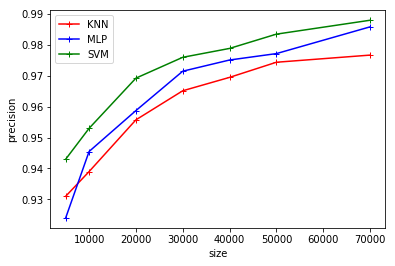

In [9]:
plt.plot([5000,10000,20000,30000,40000,50000,70000],precision_knn,'r+-', label="KNN")
plt.plot([5000,10000,20000,30000,40000,50000,70000],precision_nn,'b+-', label="MLP")
plt.plot([5000,10000,20000,30000,40000,50000,70000],precision_svm,'g+-', label="SVM")
plt.ylabel('precision')
plt.xlabel('size')
plt.legend()
plt.show()

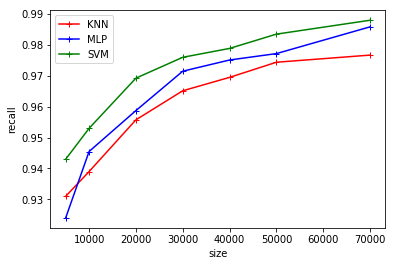

In [10]:
plt.plot([5000,10000,20000,30000,40000,50000,70000],recall_knn,'r+-', label="KNN")
plt.plot([5000,10000,20000,30000,40000,50000,70000],recall_nn,'b+-', label="MLP")
plt.plot([5000,10000,20000,30000,40000,50000,70000],recall_svm,'g+-', label="SVM")
plt.ylabel('recall')
plt.xlabel('size')
plt.legend()
plt.show()

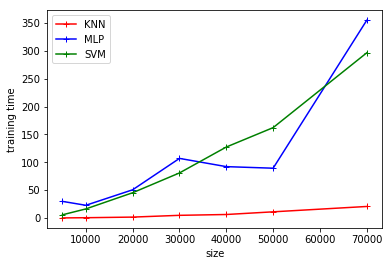

In [11]:
plt.plot([5000,10000,20000,30000,40000,50000,70000],time_knn,'r+-', label="KNN")
plt.plot([5000,10000,20000,30000,40000,50000,70000],time_nn,'b+-', label="MLP")
plt.plot([5000,10000,20000,30000,40000,50000,70000],time_svm,'g+-', label="SVM")
plt.ylabel('training time')
plt.xlabel('size')
plt.legend()
plt.show()

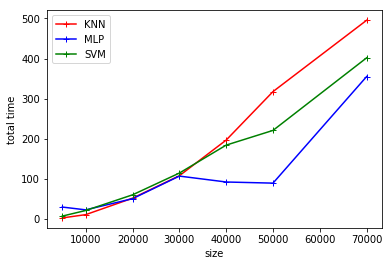

In [13]:
plt.plot([5000,10000,20000,30000,40000,50000,70000],tot_time_knn,'r+-', label="KNN")
plt.plot([5000,10000,20000,30000,40000,50000,70000],tot_time_nn,'b+-', label="MLP")
plt.plot([5000,10000,20000,30000,40000,50000,70000],tot_time_svm,'g+-', label="SVM")
plt.ylabel('total time')
plt.xlabel('size')
plt.legend()
plt.show()

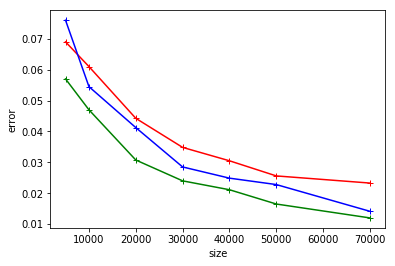

In [14]:
plt.plot([5000,10000,20000,30000,40000,50000,70000],error_knn,'r+-', label="KNN")
plt.plot([5000,10000,20000,30000,40000,50000,70000],error_nn,'b+-', label="NN")
plt.plot([5000,10000,20000,30000,40000,50000,70000],error_svm,'g+-', label="SVM")
plt.ylabel('error')
plt.xlabel('size')
plt.show()